In [1]:
from setup import set_project_root
set_project_root()

from config import DATA_FILE, DROP_COLS, TARGET, DESTINATION_FRAME, NULL_FILE, CLEAN_FILE


Current working directory: /home/exodia/Documentos/TFBigData


In [2]:
import pyarrow.parquet as pq
import pandas as pd
import h2o
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from src.analysis import ( data_quality,
                          enhanced_analysis,
                          summary_analysis,
                          univariate_analysis,
                          visualization )

# Importar funciones principales
from src.descriptive_analysis import (
    load_and_validate_data,
    create_niche_analysis_plots,
    analyze_property_types,
    analyze_market_behavior,
    analyze_market_segmentation,
    run_complete_descriptive_analysis,
    export_results_to_csv,
    generate_summary_report,
    configure_plot_style,
    analyze_seasonal_patterns,
    create_market_segmentation_plots,
    print_segmentation_insights,
    create_market_behavior_plots
)


# 02 - An√°lisis Descriptivo

## Objetivo

**An√°lisis exhaustivo del mercado inmobiliario dan√©s** que incluye:

- **KPIs regionales**: Precios, volumen y competitividad por zona geogr√°fica
- **Evoluci√≥n temporal**: Tendencias anuales, estacionales y patrones de mercado  
- **Diferenciaci√≥n por tipo**: Comparativa de precios y caracter√≠sticas por tipo de propiedad
- **Comportamiento de mercado**: Canales de venta, negociaci√≥n y tiempo en mercado
- **Segmentaci√≥n**: Identificaci√≥n de segmentos de mercado y oportunidades

**Dataset**: Dataset limpio

# 1. KPIs por Regi√≥n

An√°lisis completo de indicadores clave de performance del mercado inmobiliario dan√©s por regi√≥n geogr√°fica.

- 1.2 Precio por m¬≤ por regi√≥n  
- 1.3 Volumen de transacciones por regi√≥n
- 1.1 Precio promedio y mediano por regi√≥n
- 1.4 Ranking de regiones m√°s caras/baratas
- 1.5 Visualizaciones geogr√°ficas

In [3]:
# Configurar estilo de visualizaciones
configure_plot_style()

# Cargar datos usando la funci√≥n del m√≥dulo
df_clean = load_and_validate_data(data_path=CLEAN_FILE, destination_frame=DESTINATION_FRAME, parallel=False)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.8" 2023-07-18; OpenJDK Runtime Environment Temurin-17.0.8+7 (build 17.0.8+7); OpenJDK 64-Bit Server VM Temurin-17.0.8+7 (build 17.0.8+7, mixed mode, sharing)
  Starting server from /home/exodia/miniconda3/envs/TFBigData/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4lpbgw7m
  JVM stdout: /tmp/tmp4lpbgw7m/h2o_exodia_started_from_python.out
  JVM stderr: /tmp/tmp4lpbgw7m/h2o_exodia_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/Lima
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    3 months and 15 days
H2O_cluster_name:           H2O_from_python_exodia_dgldmj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6.723 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.18 final
--------------------------  -----------------------------

Importando datos desde /home/exodia/Documentos/TFBigData/data/processed/cleaned_data.parquet

Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
Datos importados a H2O con destino: datos_h2o

Dimensiones del H2OFrame: 1,506,591 filas √ó 19 columnas

Datos cargados: 1,506,591 registros x 19 columnas
Per√≠odo: 694569600000000000 - 1727654400000000000
Regiones: 4
Rango precios: 250,010 - 46,800,000 DKK


### 1.1 Precio Promedio y Mediano por Regi√≥n

An√°lisis estad√≠stico de precios por regi√≥n con intervalos de confianza y ranking comparativo.

In [4]:
# === 1.1 AN√ÅLISIS REGIONAL DE PRECIOS ===
# Importar funciones espec√≠ficas del m√≥dulo
from src.descriptive_analysis import (
    analyze_regional_prices,
    print_regional_summary,
    create_regional_price_plots,
    print_regional_insights,
    analyze_sqm_prices,
    create_ranking_comparison
)

print("üè¢ AN√ÅLISIS REGIONAL COMPLETO")
print("=" * 50)

# Ejecutar an√°lisis regional
regional_stats = analyze_regional_prices(df_clean)
top_regions = print_regional_summary(regional_stats)
display(top_regions)

üè¢ AN√ÅLISIS REGIONAL COMPLETO
ESTAD√çSTICAS DE PRECIOS POR REGI√ìN
Total regiones analizadas: 4
Rango precios promedio: 1,203,900 - 2,381,799 DKK

TOP 10 REGIONES M√ÅS CARAS
----------------------------------------


Transacciones   Promedio    Mediana        Std         Q1  \
region                                                                     
Zealand               597090  2381799.0  1844002.0  2020751.0  1000000.0   
Jutland               755183  1619517.0  1200000.0  1508674.0   710000.0   
Fyn & islands         138425  1598314.0  1200000.0  1466908.0   740000.0   
Bornholm               15893  1203900.0   895000.0  1201383.0   580000.0   

                      Q3  Minimo    Maximo   CI_Lower   CI_Upper  
region                                                            
Zealand        3125000.0  250034  46800000  1590586.0  1606041.0  
Jutland        2000000.0  250010  45000000  1616114.0  1622919.0  
Fyn & islands  1965000.0  250062  45955000  1185220.0  1222579.0  
Bornholm       1432505.0  250750  23500000  2376673.0  2386925.0

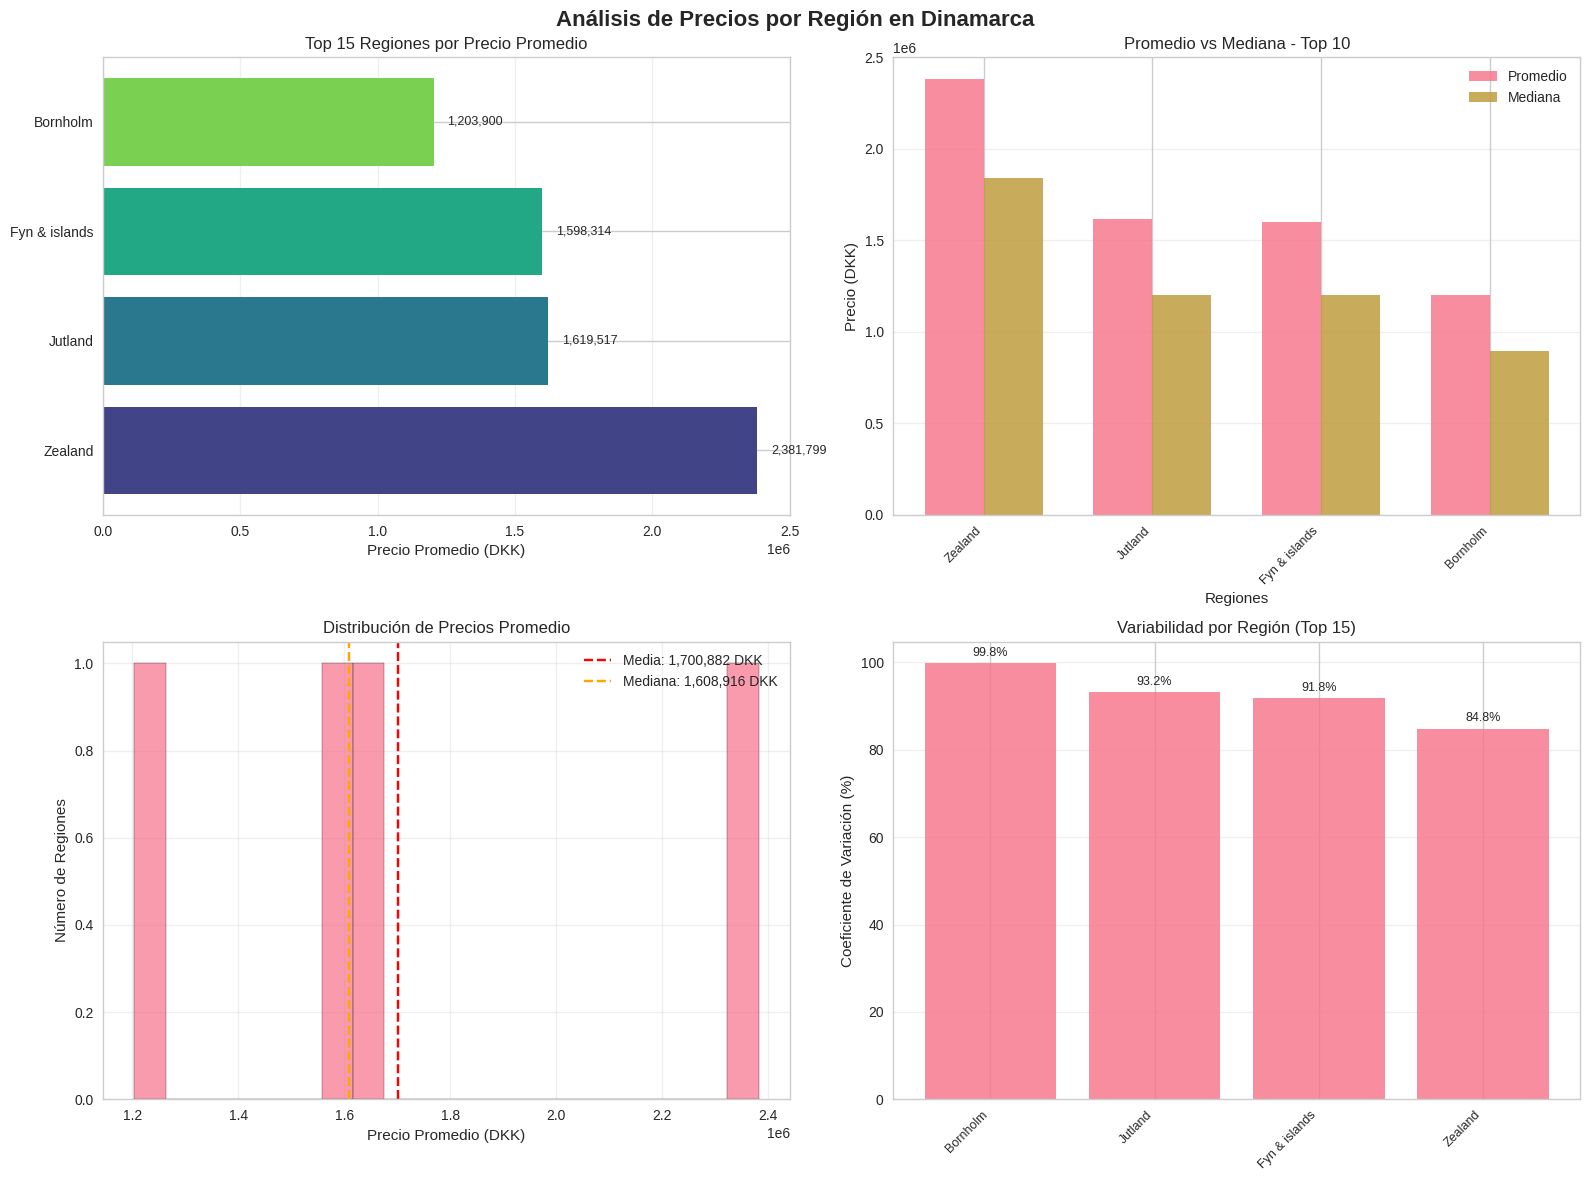


INSIGHTS CLAVE - PRECIOS REGIONALES
Regi√≥n m√°s cara: Zealand (2,381,799 DKK)
Regi√≥n m√°s econ√≥mica: Bornholm (1,203,900 DKK)
Ratio precio max/min: 2.0x
Regiones sobre la media: 1
CV promedio: 92.4%

AN√ÅLISIS DE PRECIO POR M¬≤
üí∞ Precio/m¬≤ promedio nacional: 16,342 DKK/m¬≤
üèÜ Umbral mercado premium: 21,311 DKK/m¬≤

Comparaci√≥n rankings precio total vs precio/m¬≤:


Region  Precio_Total  Precio_m2  Rank_Total  Rank_m2  \
0        Zealand     2381799.0    20803.0           1        1   
1        Jutland     1619517.0    13422.0           2        2   
2  Fyn & islands     1598314.0    13657.0           3        3   
3       Bornholm     1203900.0    10884.0           4        4   

   Diferencia_Rank  
0                0  
1                0  
2                0  
3                0

In [5]:
# === VISUALIZACIONES Y AN√ÅLISIS REGIONAL COMPLETO ===

# 1. Crear visualizaciones regionales
cv_data = create_regional_price_plots(regional_stats, df_clean)
print_regional_insights(regional_stats, cv_data)

print("\n" + "="*60)

# 2. An√°lisis de precio por m¬≤
sqm_stats, premium_threshold = analyze_sqm_prices(df_clean)
comparison_df = create_ranking_comparison(regional_stats, sqm_stats)

print("AN√ÅLISIS DE PRECIO POR M¬≤")
print("=" * 40)
print(f"üí∞ Precio/m¬≤ promedio nacional: {df_clean['sqm_price'].mean():,.0f} DKK/m¬≤")
print(f"üèÜ Umbral mercado premium: {premium_threshold:,.0f} DKK/m¬≤")

print("\nComparaci√≥n rankings precio total vs precio/m¬≤:")
display(comparison_df.head(10))

---

# 2. An√°lisis Temporal

Evoluci√≥n del mercado inmobiliario dan√©s a trav√©s del tiempo con identificaci√≥n de tendencias y patrones estacionales.

- 2.1 Evoluci√≥n anual de precios
- 2.2 An√°lisis de tendencias por regi√≥n  
- 2.3 Patrones estacionales y ciclos

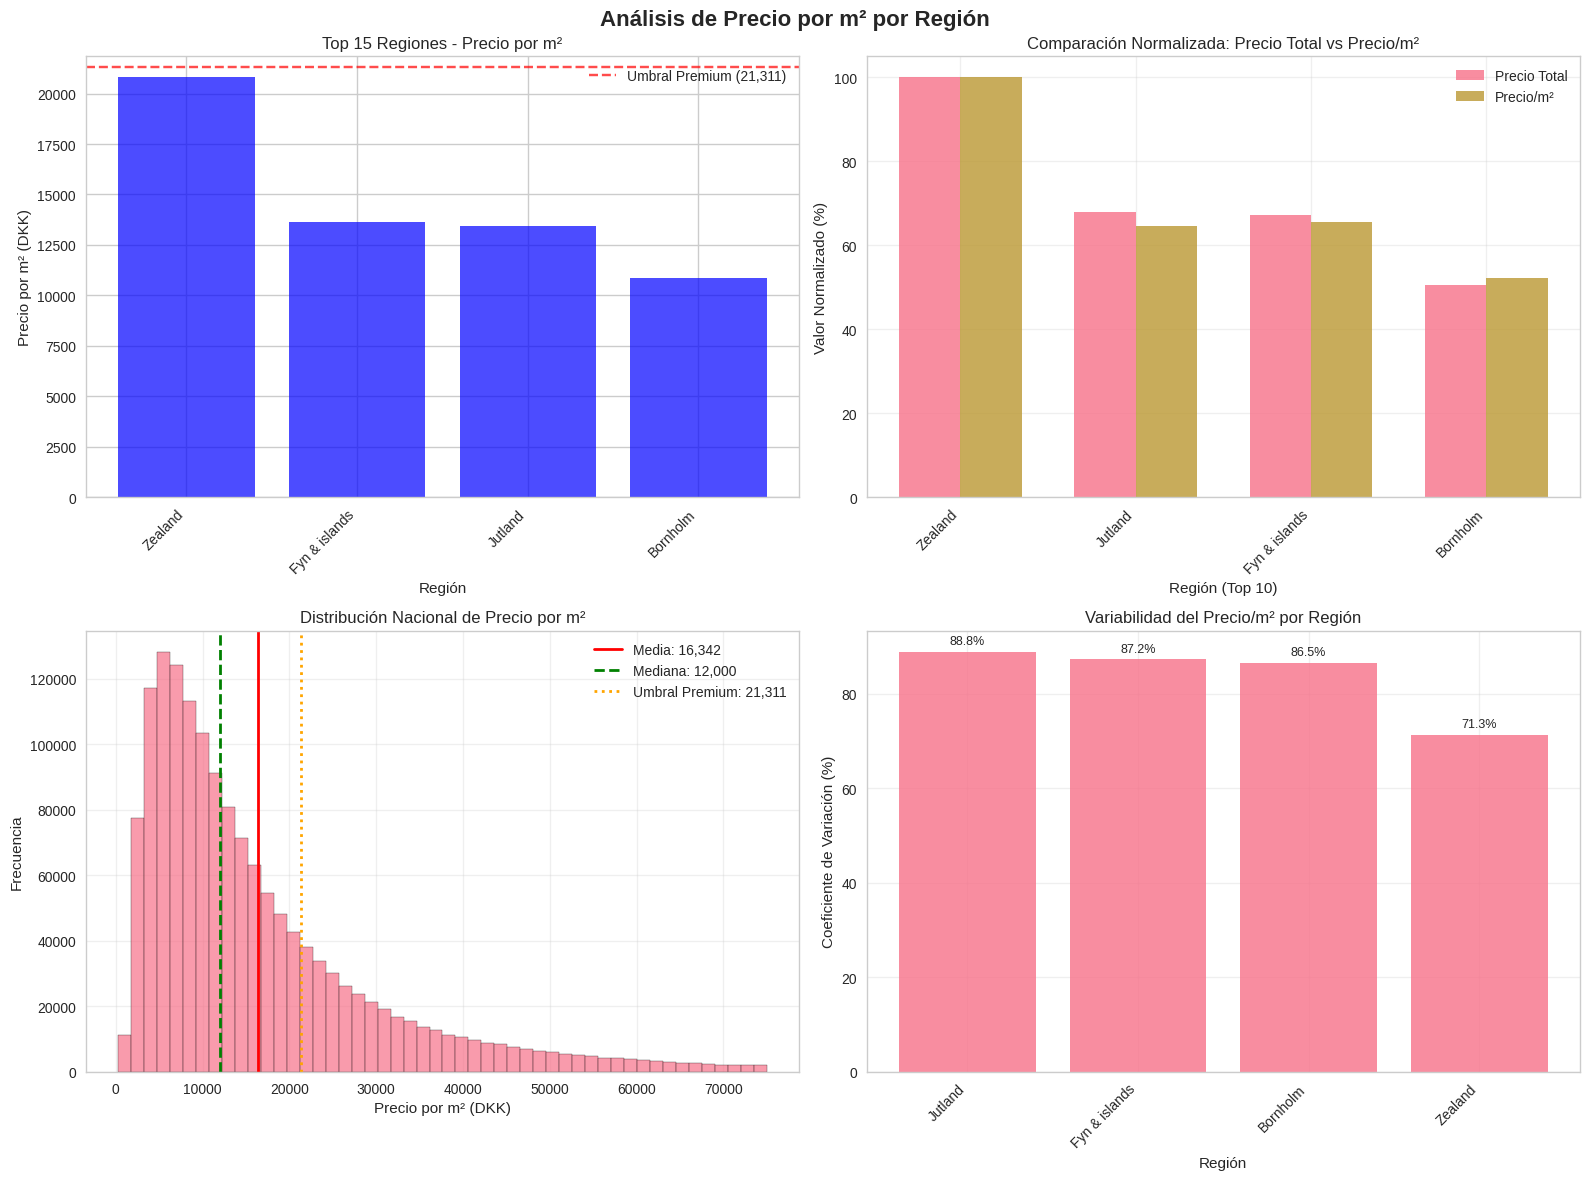


INSIGHTS CLAVE - PRECIO POR M¬≤
Regi√≥n m√°s eficiente: Zealand
Precio/m¬≤ m√°ximo: 20,803 DKK/m¬≤
Regi√≥n m√°s variable: Jutland (88.8%)
Regi√≥n m√°s estable: Zealand (71.3%)
Mayor diferencia ranking: 0 posiciones


In [6]:
# Importar funciones de visualizaci√≥n
from src.descriptive_analysis import (
    create_sqm_price_plots,
    print_sqm_insights
)

# Crear visualizaciones y mostrar insights
create_sqm_price_plots(df_clean, sqm_stats, premium_threshold, comparison_df)
print_sqm_insights(sqm_stats, comparison_df)

### 1.3 Volumen de Transacciones por Regi√≥n

An√°lisis del dinamismo del mercado inmobiliario a trav√©s del volumen de transacciones. Identificaremos las regiones con mayor actividad comercial y su relaci√≥n con los precios.

In [7]:
# Importar funciones de an√°lisis de volumen
from src.descriptive_analysis import (
    analyze_transaction_volume,
    print_volume_summary
)

# Ejecutar an√°lisis de volumen
volume_stats, correlation, high_liquidity_threshold = analyze_transaction_volume(df_clean)
print_volume_summary(volume_stats, correlation, high_liquidity_threshold)

print(f"\nTOP 15 REGIONES POR VOLUMEN")
print("-" * 30)
display(volume_stats.head(15))

AN√ÅLISIS DE VOLUMEN DE TRANSACCIONES
Total transacciones: 1,506,591
Volumen total: 2,885,560,121,742 DKK
Correlaci√≥n volumen-precio/m¬≤: 0.547
Regiones alta liquidez: 1

CONCENTRACI√ìN DE MERCADO
-------------------------
Regiones que concentran 80% del mercado: 1
Participaci√≥n top 10: 100.0%

DISTRIBUCI√ìN POR TIPO DE MERCADO
------------------------------
Principal: 3 regiones (75.0%)
Terciario: 1 regiones (25.0%)

TOP 15 REGIONES POR VOLUMEN
------------------------------


Num_Transacciones  Volumen_Total_DKK  Precio_Promedio_m2  \
region                                                                    
Jutland                   755183      1223031571974             13422.0   
Zealand                   597090      1422148388984             20803.0   
Fyn & islands             138425       221246584130             13657.0   
Bornholm                   15893        19133576654             10884.0   

               Participacion_Mercado  Participacion_Acumulada Tipo_Mercado  \
region                                                                       
Jutland                    50.125283                50.125283    Principal   
Zealand                    39.631858                89.757140    Principal   
Fyn & islands               9.187961                98.945102    Principal   
Bornholm                    1.054898               100.000000    Terciario   

               Alta_Liquidez  
region                        
Jutland                 True  
Zealand                False  
Fyn & islands          False  
Bornholm               False

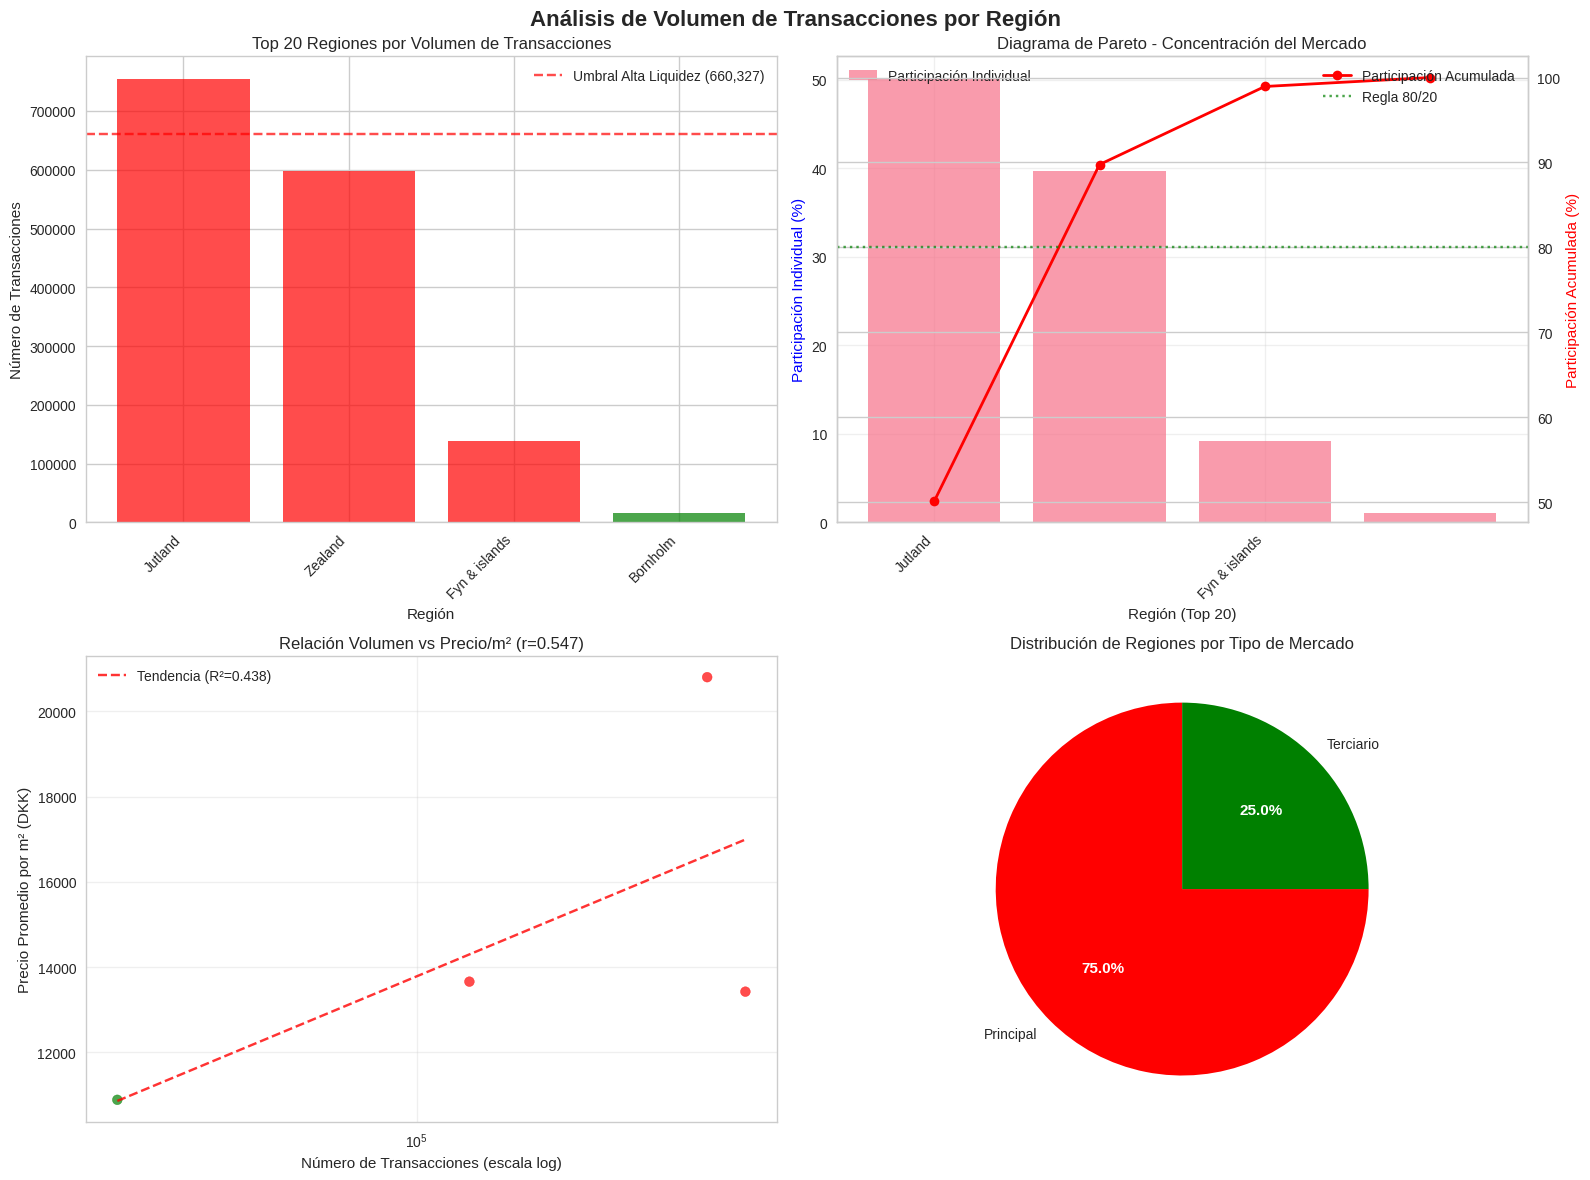


INSIGHTS CLAVE - VOLUMEN DE TRANSACCIONES
Regi√≥n l√≠der: Jutland (755,183 trans.)
Participaci√≥n del l√≠der: 50.1%
Mercados principales: 3 regiones
Concentraci√≥n top 5: 100.0%
Correlaci√≥n volumen-precio: Positiva (0.547)


In [8]:
# Importar funciones de visualizaci√≥n de volumen
from src.descriptive_analysis import (
    create_volume_plots,
    print_volume_insights
)

# Crear visualizaciones y mostrar insights
create_volume_plots(volume_stats, correlation, high_liquidity_threshold)
print_volume_insights(volume_stats, correlation)

## 2. An√°lisis Temporal

### 2.1 Evoluci√≥n de Precios por A√±o

An√°lisis de la evoluci√≥n temporal del mercado inmobiliario dan√©s desde 1992 hasta 2024.

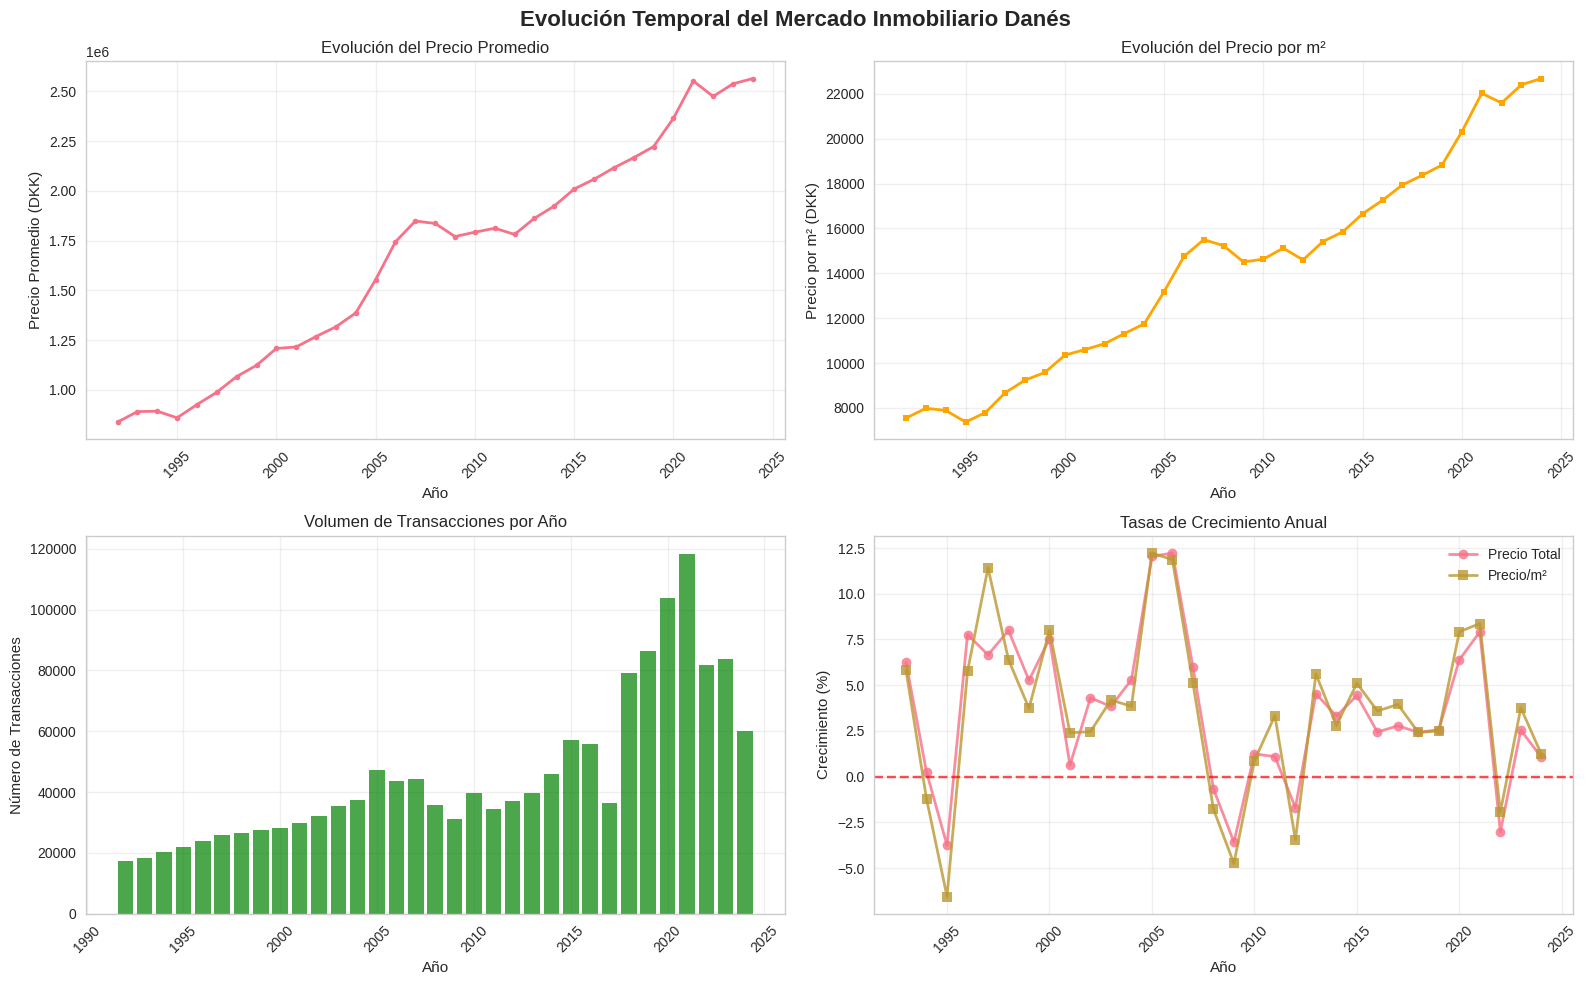

INSIGHTS TEMPORALES
Mayor crecimiento: 2006 (12.2%)
Mayor declive: 1995 (-3.8%)
Crecimiento promedio anual: 3.6%
Per√≠odo analizado: 1992 - 2024

ESTAD√çSTICAS ANUALES (√öLTIMOS 10 A√ëOS)
----------------------------------------


Transacciones  Precio_Promedio  Precio_Mediana  Precio_Std  \
year                                                               
2015          57214        2009160.0       1530000.0   1766041.0   
2016          55890        2058150.0       1595000.0   1769288.0   
2017          36344        2115366.0       1635000.0   1788191.0   
2018          79101        2166570.0       1675000.0   1836794.0   
2019          86434        2222180.0       1700000.0   1903253.0   
2020         103847        2364256.0       1825000.0   1984536.0   
2021         118342        2551422.0       1995000.0   2077377.0   
2022          81800        2474367.0       1930000.0   2019003.0   
2023          83916        2537415.0       1995000.0   2085878.0   
2024          60039        2564134.0       2015000.0   2022081.0   

      Precio_m2_Promedio  Precio_m2_Mediana  Crecimiento_Precio  \
year                                                              
2015             16656.0            13242.0            4.438680   
2016             17254.0            13631.0            2.438332   
2017             17935.0            14024.0            2.779972   
2018             18368.0            14423.0            2.420574   
2019             18828.0            15000.0            2.566730   
2020             20319.0            16250.0            6.393541   
2021             22020.0            17557.0            7.916486   
2022             21594.0            17190.0           -3.020081   
2023             22406.0            18129.0            2.548046   
2024             22682.0            18462.0            1.053001   

      Crecimiento_m2  
year                  
2015        5.105067  
2016        3.590298  
2017        3.946911  
2018        2.414274  
2019        2.504355  
2020        7.919057  
2021        8.371475  
2022       -1.934605  
2023        3.760304  
2024        1.231813

In [9]:
# Importar funciones de an√°lisis temporal
from src.descriptive_analysis import (
    analyze_temporal_trends,
    create_temporal_plots,
    print_temporal_insights
)

# Ejecutar an√°lisis temporal
if 'date' in df_clean.columns:
    yearly_stats = analyze_temporal_trends(df_clean)
    create_temporal_plots(yearly_stats)
    print_temporal_insights(yearly_stats)
    
    print(f"\nESTAD√çSTICAS ANUALES (√öLTIMOS 10 A√ëOS)")
    print("-" * 40)
    display(yearly_stats.tail(10))
else:
    print("Columna 'date' no encontrada. An√°lisis temporal no disponible.")

## An√°lisis Espec√≠ficos Opcionales

Las siguientes celdas muestran c√≥mo usar funciones espec√≠ficas del m√≥dulo `descriptive_analysis` para an√°lisis personalizados:

# 3. Diferencias por Tipo de Propiedad

An√°lisis completo de las diferencias en precios, caracter√≠sticas y comportamiento seg√∫n el tipo de propiedad.

- 3.1 Comparativa de precios por house_type
- 3.2 Caracter√≠sticas f√≠sicas promedio por tipo  
- 3.3 Distribuci√≥n geogr√°fica por tipo
- 3.4 Evoluci√≥n temporal por tipo de propiedad

In [10]:
# ===== AN√ÅLISIS POR TIPO DE PROPIEDAD =====
import importlib
import src.descriptive_analysis
importlib.reload(src.descriptive_analysis)

from src.descriptive_analysis import analyze_property_types

# Ejecutar an√°lisis completo por tipo de propiedad
price_stats_by_type, physical_stats_by_type, regional_dist_by_type = analyze_property_types(df_clean, TARGET)

# Formatear estad√≠sticas manualmente
price_stats_formatted = price_stats_by_type.copy()
for col in ['count', 'mean', 'median', 'std', 'min', 'max']:
    if col == 'count':
        price_stats_formatted[col] = price_stats_formatted[col].apply(lambda x: f"{x:,.0f}")
    else:
        price_stats_formatted[col] = price_stats_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
price_stats_formatted['cv'] = price_stats_formatted['cv'].apply(lambda x: f"{x:.1f}%")

display(price_stats_formatted)

# Mostrar caracter√≠sticas f√≠sicas
print("\nüèóÔ∏è Caracter√≠sticas f√≠sicas por tipo:")
display(physical_stats_by_type)

# Mostrar distribuci√≥n regional
print("üîù Top 3 regiones por concentraci√≥n de cada tipo:")
for house_type in regional_dist_by_type.columns:
    top_regions_for_type = regional_dist_by_type[house_type].nlargest(3)
    print(f"\n{house_type}:")
    for region, pct in top_regions_for_type.items():
        print(f"  ‚Ä¢ {region}: {pct:.1f}%")

üè† AN√ÅLISIS POR TIPO DE PROPIEDAD

üìä 3.1 Estad√≠sticas de precios por tipo de propiedad:

üèóÔ∏è 3.2 Caracter√≠sticas f√≠sicas por tipo:

üåç 3.3 Distribuci√≥n regional por tipo de propiedad:


count           mean         median            std  \
house_type                                                          
Apartment    293,435  2,406,994 DKK  1,925,000 DKK  1,841,846 DKK   
Farm          73,904  2,731,946 DKK  1,700,000 DKK  3,127,039 DKK   
Townhouse    155,301  2,114,122 DKK  1,700,000 DKK  1,592,611 DKK   
Villa        816,161  1,771,535 DKK  1,295,000 DKK  1,637,110 DKK   
Summerhouse  167,790  1,210,914 DKK    950,924 DKK  1,006,275 DKK   

                     min             max      cv  
house_type                                        
Apartment    250,325 DKK  46,000,000 DKK   76.5%  
Farm         250,057 DKK  46,800,000 DKK  114.5%  
Townhouse    250,034 DKK  37,800,000 DKK   75.3%  
Villa        250,010 DKK  45,500,000 DKK   92.4%  
Summerhouse  250,037 DKK  45,955,000 DKK   83.1%


üèóÔ∏è Caracter√≠sticas f√≠sicas por tipo:


sqm_mean  sqm_median  sqm_std  no_rooms_mean  no_rooms_median  \
house_type                                                                   
Apartment       86.44        79.0    41.12           2.87              3.0   
Farm           197.10       187.0    72.51           6.09              6.0   
Summerhouse     83.35        76.0    41.77           3.78              4.0   
Townhouse      108.56       106.0    30.91           3.88              4.0   
Villa          151.90       146.0    48.08           4.97              5.0   

             no_rooms_std  sqm_price_mean  sqm_price_median  sqm_price_std  
house_type                                                                  
Apartment            1.12        28442.19          25237.11       17092.89  
Farm                 2.08        13845.66           9405.94       13172.39  
Summerhouse          1.11        15064.12          12900.00        9701.31  
Townhouse            1.10        19463.95          16473.91       13031.31  
Villa                1.46        11886.33           9048.48        9744.72

üîù Top 3 regiones por concentraci√≥n de cada tipo:

Apartment:
  ‚Ä¢ Zealand: 52.3%
  ‚Ä¢ Jutland: 40.5%
  ‚Ä¢ Fyn & islands: 7.0%

Farm:
  ‚Ä¢ Jutland: 66.5%
  ‚Ä¢ Zealand: 21.6%
  ‚Ä¢ Fyn & islands: 10.3%

Summerhouse:
  ‚Ä¢ Jutland: 49.1%
  ‚Ä¢ Zealand: 43.3%
  ‚Ä¢ Fyn & islands: 5.6%

Townhouse:
  ‚Ä¢ Zealand: 48.0%
  ‚Ä¢ Jutland: 38.8%
  ‚Ä¢ Fyn & islands: 11.4%

Villa:
  ‚Ä¢ Jutland: 54.5%
  ‚Ä¢ Zealand: 34.4%
  ‚Ä¢ Fyn & islands: 10.2%


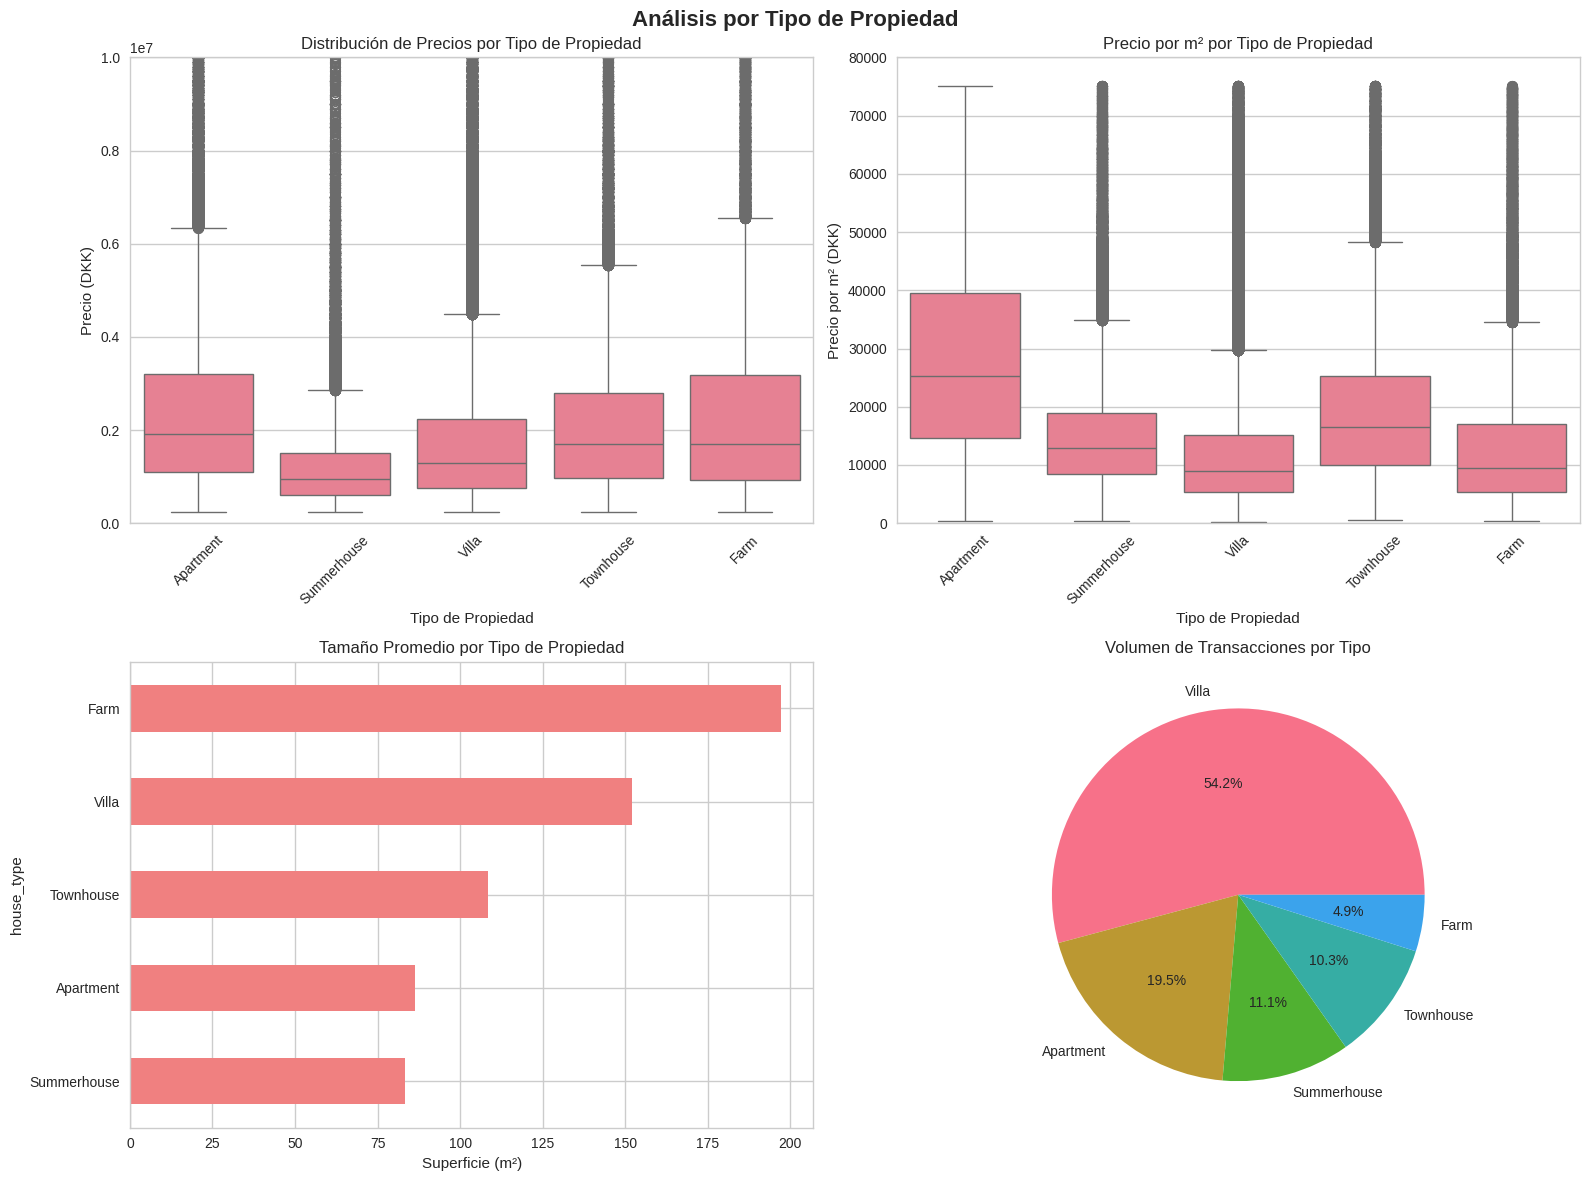


3.4 Tests de significancia estad√≠stica entre tipos de propiedad:
ANOVA - Diferencias de precio entre tipos de propiedad:
F-estad√≠stico: 19086.99
p-valor: 0.00e+00
Interpretaci√≥n: Hay diferencias significativas

3.5 Correlaciones precio vs caracter√≠sticas por tipo:
Apartment:
  Correlaci√≥n precio-tama√±o: 0.418
  Correlaci√≥n precio-habitaciones: 0.368
Summerhouse:
  Correlaci√≥n precio-tama√±o: 0.355
  Correlaci√≥n precio-habitaciones: 0.247
Villa:
  Correlaci√≥n precio-tama√±o: 0.277
  Correlaci√≥n precio-habitaciones: 0.208
Townhouse:
  Correlaci√≥n precio-tama√±o: 0.374
  Correlaci√≥n precio-habitaciones: 0.284
Farm:
  Correlaci√≥n precio-tama√±o: 0.351
  Correlaci√≥n precio-habitaciones: 0.272

üìä Resultados del an√°lisis estad√≠stico guardados en 'property_significance'
‚úÖ F-estad√≠stico ANOVA: 19086.99
‚úÖ P-valor: 0.00e+00
‚úÖ Correlaciones por tipo disponibles en el diccionario


In [11]:
# ===== VISUALIZACIONES Y AN√ÅLISIS ESTAD√çSTICO =====
from src.descriptive_analysis import create_property_type_plots, analyze_property_type_significance

# Crear visualizaciones por tipo de propiedad
create_property_type_plots(df_clean, TARGET)

# An√°lisis de significancia estad√≠stica
property_significance = analyze_property_type_significance(df_clean, TARGET)

print("\nüìä Resultados del an√°lisis estad√≠stico guardados en 'property_significance'")
print(f"‚úÖ F-estad√≠stico ANOVA: {property_significance['anova_f_stat']:.2f}")
print(f"‚úÖ P-valor: {property_significance['anova_p_value']:.2e}")
print(f"‚úÖ Correlaciones por tipo disponibles en el diccionario")

# 4. An√°lisis del Comportamiento de Mercado

An√°lisis detallado del comportamiento del mercado inmobiliario dan√©s, incluyendo canales de venta, patrones de negociaci√≥n y estacionalidad.

- 4.1 An√°lisis de sales_type (subasta vs venta regular)
- 4.2 Variaci√≥n precio oferta vs compra  
- 4.3 Tiempo en mercado (an√°lisis quarter)
- 4.4 Patrones estacionales

In [12]:
# ===== AN√ÅLISIS DEL COMPORTAMIENTO DE MERCADO =====
from src.descriptive_analysis import analyze_market_behavior

# Ejecutar an√°lisis completo del comportamiento de mercado
market_behavior_results = analyze_market_behavior(df_clean, TARGET)

# Mostrar resultados de sales_type si est√° disponible
if market_behavior_results['sales_analysis'] is not None:
    print("\nüìä An√°lisis por tipo de venta:")
    # Formatear para mostrar
    sales_formatted = market_behavior_results['sales_analysis'].copy()
    for col in sales_formatted.columns:
        if 'count' in col:
            sales_formatted[col] = sales_formatted[col].apply(lambda x: f"{x:,.0f}")
        elif 'DKK' not in str(sales_formatted[col].iloc[0]):
            sales_formatted[col] = sales_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
    
    display(sales_formatted)

# Mostrar an√°lisis de cambio oferta-compra si est√° disponible
if market_behavior_results['change_analysis'] is not None:
    change_stats = market_behavior_results['change_analysis']['stats']
    print(f"\nüí∞ An√°lisis de variaci√≥n precio oferta vs compra:")
    print(f"Media: {change_stats['mean']:.2f}%")
    print(f"Mediana: {change_stats['50%']:.2f}%")
    print(f"Desv. Std: {change_stats['std']:.2f}%")
    print(f"Rango: {change_stats['min']:.2f}% a {change_stats['max']:.2f}%")

# Mostrar an√°lisis trimestral si est√° disponible
if market_behavior_results.get('quarterly_analysis') is not None:
    print("\nüìÖ Estad√≠sticas por trimestre:")
    display(market_behavior_results['quarterly_analysis'])
    
    print("\nüìà An√°lisis por mes:")
    display(market_behavior_results['monthly_analysis'])

print(f"\nüìä Resultados completos guardados en 'market_behavior_results'")

=== AN√ÅLISIS DEL COMPORTAMIENTO DE MERCADO ===
4.1 Columnas disponibles relacionadas con mercado:
Columnas encontradas: ['quarter', 'house_type', 'sales_type', '%_change_between_offer_and_purchase']

4.1 An√°lisis por tipo de venta (sales_type):

4.2 An√°lisis de variaci√≥n precio oferta vs compra (%_change_between_offer_and_purchase):
Distribuci√≥n de cambios:
  Sin cambio ¬±1%: 973,567 (64.6%)
  Descuento >5%: 275,583 (18.3%)
  Descuento 1-5%: 230,177 (15.3%)
  Premium 1-5%: 17,074 (1.1%)
  Premium >5%: 10,190 (0.7%)

4.4 An√°lisis estacional usando la fecha:
Estad√≠sticas por trimestre (derivado de fecha):

üìä An√°lisis por tipo de venta:


purchase_price_count purchase_price_mean purchase_price_median  \
sales_type                                                                    
-                              19       1,411,172 DKK         1,140,000 DKK   
auction                    17,102       1,390,047 DKK           845,000 DKK   
family_sale               121,116       1,493,534 DKK           955,303 DKK   
other_sale                 36,637       1,778,170 DKK         1,050,000 DKK   
regular_sale            1,331,717       1,964,173 DKK         1,465,000 DKK   

             purchase_price_std sqm_price_mean sqm_price_median  
sales_type                                                       
-                   879,951 DKK     12,585 DKK       13,087 DKK  
auction           1,606,859 DKK     13,520 DKK        7,333 DKK  
family_sale       1,815,361 DKK     12,720 DKK        9,000 DKK  
other_sale        2,074,054 DKK     16,109 DKK        8,896 DKK  
regular_sale      1,747,075 DKK     16,714 DKK       12,485 DKK


üí∞ An√°lisis de variaci√≥n precio oferta vs compra:
Media: -2.08%
Mediana: 0.00%
Desv. Std: 4.81%
Rango: -49.00% a 49.00%

üìÖ Estad√≠sticas por trimestre:


purchase_price_count  purchase_price_mean  \
quarter_from_date                                              
1                                356565            1944098.0   
2                                412866            1916026.0   
3                                381597            1893702.0   
4                                355563            1908718.0   

                   purchase_price_median  sqm_price_mean  sqm_price_median  
quarter_from_date                                                           
1                              1402500.0         16469.0           12043.0  
2                              1400000.0         16368.0           12077.0  
3                              1395000.0         16176.0           12000.0  
4                              1385000.0         16363.0           11907.0


üìà An√°lisis por mes:


count       mean     median
month                              
1      110218  1975422.0  1425000.0
2      113755  1941374.0  1410000.0
3      132592  1920398.0  1400000.0
4      126873  1928974.0  1400000.0
5      138042  1912685.0  1402575.0
6      147951  1908040.0  1400000.0
7      121578  1915757.0  1420000.0
8      126710  1863422.0  1364998.0
9      133309  1902370.0  1395000.0
10     127826  1879573.0  1375000.0
11     121050  1916398.0  1395000.0
12     106687  1934925.0  1380000.0


üìä Resultados completos guardados en 'market_behavior_results'


---

## üöÄ An√°lisis Completo con Una Sola Funci√≥n

**Opcional**: Tambi√©n puedes ejecutar todo el an√°lisis de una vez usando la funci√≥n principal:

In [13]:
# ===== FUNCI√ìN PRINCIPAL COMPLETA (OPCIONAL) =====
# Descomenta las siguientes l√≠neas para ejecutar todo el an√°lisis de una vez:

# from src.descriptive_analysis import run_complete_descriptive_analysis

# # Ejecutar an√°lisis completo con visualizaciones
# complete_results = run_complete_descriptive_analysis(
#     df_clean, 
#     target=TARGET, 
#     include_visualizations=True
# )

# # Los resultados incluyen:
# # - complete_results['regional_stats']: An√°lisis regional

# # - complete_results['property_analysis']: An√°lisis por tipo de propiedad  
# # - complete_results['market_behavior']: Comportamiento de mercado
# # - complete_results['market_segmentation']: Segmentaci√≥n de mercado
# # - complete_results['seasonal_patterns']: Patrones estacionales
# # Y muchos m√°s...

print("üí° Funci√≥n principal disponible para an√°lisis completo automatizado")
print("üìñ Descomenta el c√≥digo arriba para usarla")

üí° Funci√≥n principal disponible para an√°lisis completo automatizado
üìñ Descomenta el c√≥digo arriba para usarla


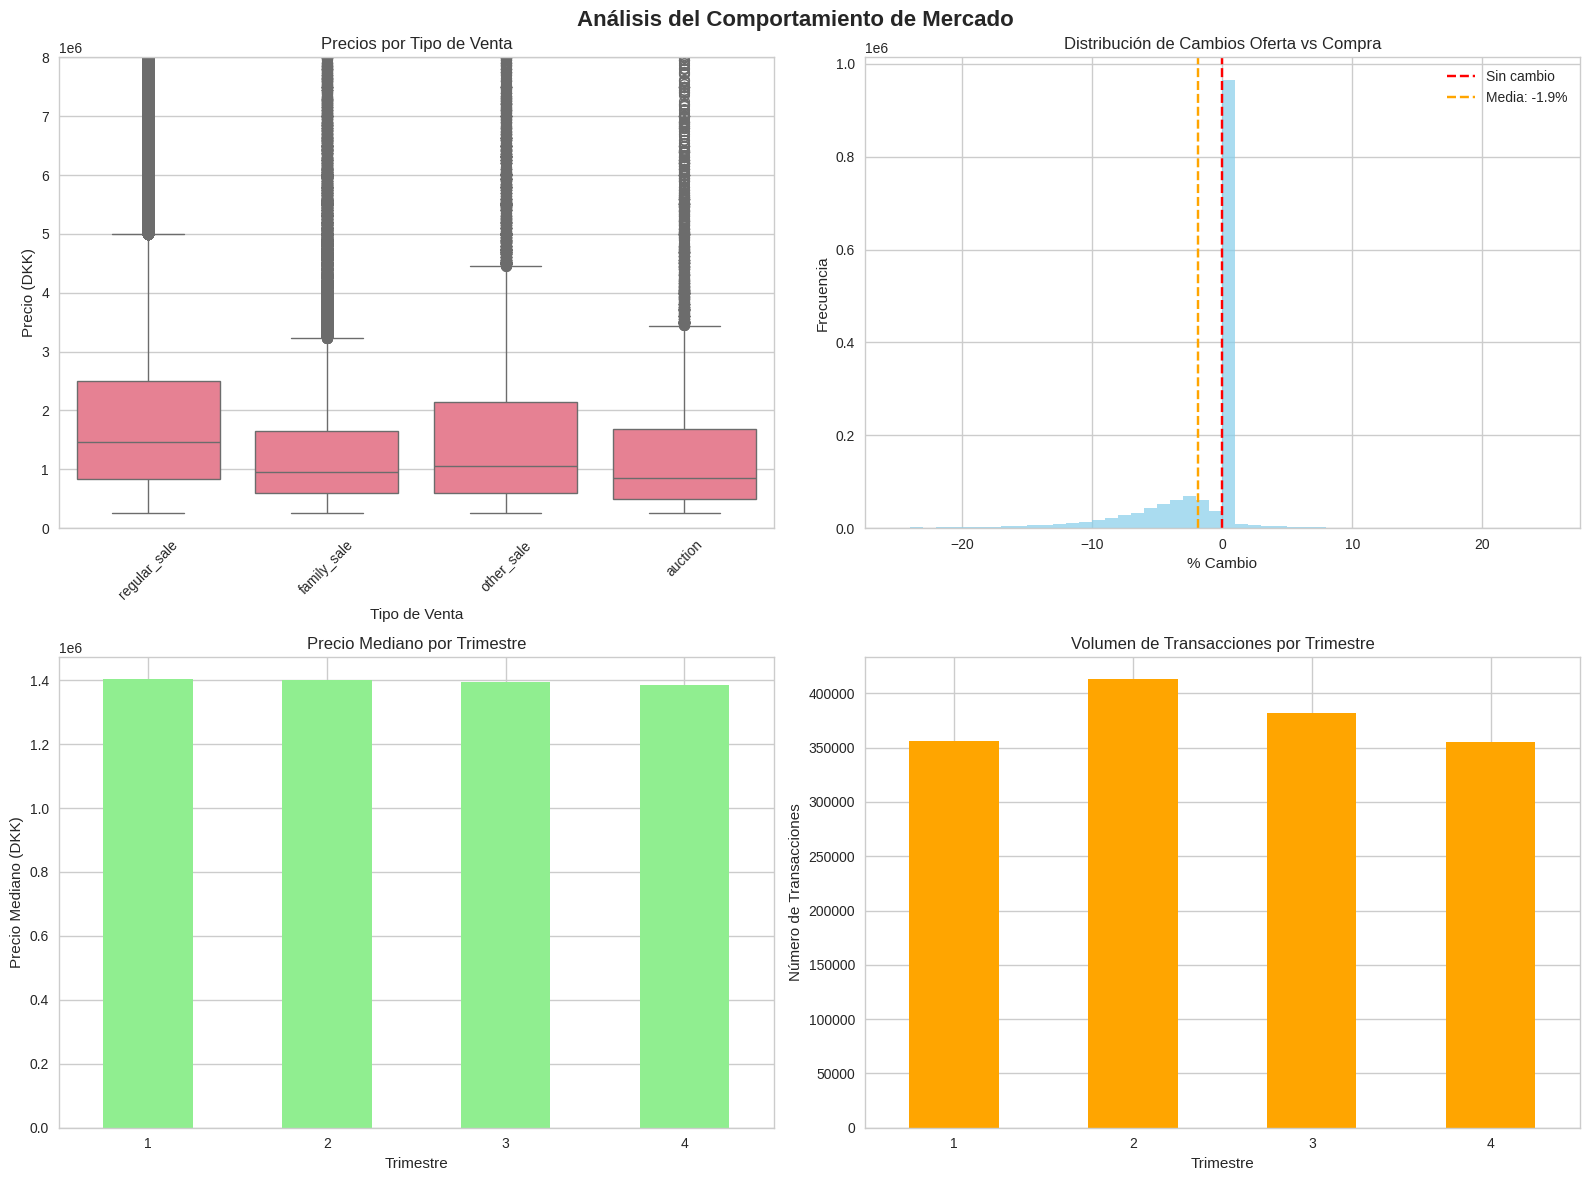


4.5 An√°lisis de estacionalidad mensual:


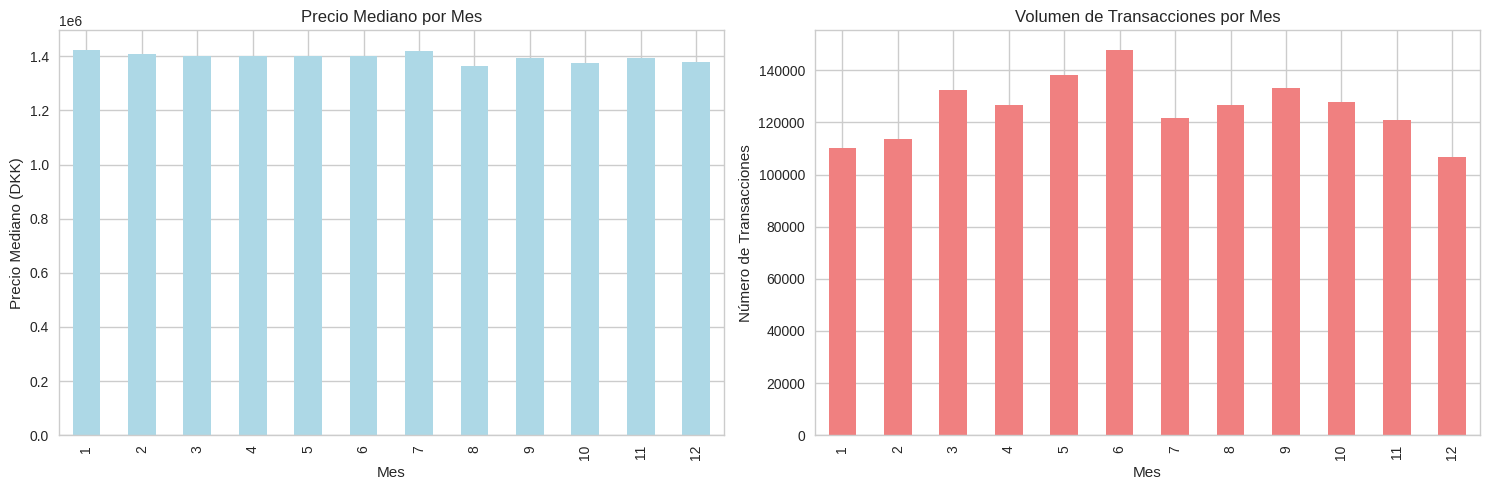

Patrones estacionales identificados:
- Mes con precios m√°s altos: 1 (1,425,000 DKK)
- Mes con precios m√°s bajos: 8 (1,364,998 DKK)
- Mes con m√°s transacciones: 6 (147,951 transacciones)
- Mes con menos transacciones: 12 (106,687 transacciones)

üå§Ô∏è INSIGHTS ESTACIONALES ADICIONALES:
üìä Variaci√≥n estacional de precios: 4.3%
üìà Variaci√≥n estacional de volumen: 32.9%
‚úÖ Baja variaci√≥n estacional en precios - mercado estable
‚ö†Ô∏è  Alta variaci√≥n estacional en volumen - demanda muy estacional

‚úÖ Resultados estacionales guardados en 'seasonal_results'


In [14]:
# ===== VISUALIZACIONES DEL COMPORTAMIENTO DE MERCADO =====

# Crear visualizaciones del comportamiento de mercado
create_market_behavior_plots(df_clean, market_behavior_results, TARGET)

# An√°lisis estacional detallado
seasonal_results = analyze_seasonal_patterns(df_clean, TARGET)

if seasonal_results:
    print(f"\nüå§Ô∏è INSIGHTS ESTACIONALES ADICIONALES:")
    print("=" * 40)
    
    # Calcular variaci√≥n estacional
    monthly_prices = seasonal_results['monthly_prices']
    price_variation = (monthly_prices.max() - monthly_prices.min()) / monthly_prices.mean() * 100
    
    monthly_volume = seasonal_results['monthly_volume']
    volume_variation = (monthly_volume.max() - monthly_volume.min()) / monthly_volume.mean() * 100
    
    print(f"üìä Variaci√≥n estacional de precios: {price_variation:.1f}%")
    print(f"üìà Variaci√≥n estacional de volumen: {volume_variation:.1f}%")
    
    # Identificar tendencias
    if price_variation > 10:
        print("‚ö†Ô∏è  Alta variaci√≥n estacional en precios - mercado sensible a estacionalidad")
    else:
        print("‚úÖ Baja variaci√≥n estacional en precios - mercado estable")
        
    if volume_variation > 30:
        print("‚ö†Ô∏è  Alta variaci√≥n estacional en volumen - demanda muy estacional")
    else:
        print("‚úÖ Variaci√≥n moderada en volumen")

print(f"\n‚úÖ Resultados estacionales guardados en 'seasonal_results'")

# 5. Segmentaci√≥n de Mercado

An√°lisis de diferentes segmentos del mercado inmobiliario dan√©s para identificar patrones y oportunidades espec√≠ficas.

- 5.1 Segmento premium vs econ√≥mico
- 5.2 Propiedades nuevas vs antiguas  
- 5.3 Mercado urbano vs rural
- 5.4 An√°lisis de nicho (casas de verano, granjas)

In [15]:
# ===== SEGMENTACI√ìN DE MERCADO =====
from src.descriptive_analysis import analyze_market_segmentation

# Ejecutar an√°lisis completo de segmentaci√≥n
market_segmentation_results = analyze_market_segmentation(df_clean, TARGET)

# Mostrar estad√≠sticas de segmentaci√≥n por precio
if 'price_segmentation' in market_segmentation_results:
    segment_stats = market_segmentation_results['price_segmentation']['segment_stats']
    
    # Formatear manualmente
    segment_formatted = segment_stats.copy()
    for col in segment_formatted.columns:
        if 'count' in col:
            segment_formatted[col] = segment_formatted[col].apply(lambda x: f"{x:,.0f}")
        elif any(price_col in col for price_col in ['purchase_price', 'sqm_price']):
            segment_formatted[col] = segment_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
        elif any(metric in col for metric in ['sqm_', 'no_rooms']):
            segment_formatted[col] = segment_formatted[col].apply(lambda x: f"{x:.1f}")
    
    print("\nüí∞ SEGMENTACI√ìN POR PRECIO:")
    display(segment_formatted)

# Mostrar estad√≠sticas de segmentaci√≥n por antig√ºedad
if market_segmentation_results.get('age_segmentation') is not None:
    age_stats = market_segmentation_results['age_segmentation']['age_stats']
    
    # Formatear manualmente
    age_formatted = age_stats.copy()
    for col in age_formatted.columns:
        if 'count' in col:
            age_formatted[col] = age_formatted[col].apply(lambda x: f"{x:,.0f}")
        elif any(price_col in col for price_col in ['purchase_price', 'sqm_price']):
            age_formatted[col] = age_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
        elif 'property_age' in col:
            age_formatted[col] = age_formatted[col].apply(lambda x: f"{x:.0f} a√±os")
    
    print("\nüèóÔ∏è SEGMENTACI√ìN POR ANTIG√úEDAD:")
    display(age_formatted)

# Mostrar estad√≠sticas urbano vs rural
if 'urban_rural' in market_segmentation_results:
    urban_rural_stats = market_segmentation_results['urban_rural']['stats']
    
    # Formatear manualmente
    urban_rural_formatted = urban_rural_stats.copy()
    for col in urban_rural_formatted.columns:
        if 'count' in col:
            urban_rural_formatted[col] = urban_rural_formatted[col].apply(lambda x: f"{x:,.0f}")
        elif any(price_col in col for price_col in ['purchase_price', 'sqm_price']):
            urban_rural_formatted[col] = urban_rural_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
        elif 'sqm' in col:
            urban_rural_formatted[col] = urban_rural_formatted[col].apply(lambda x: f"{x:.0f} m¬≤")
    
    print("\nüèôÔ∏è SEGMENTACI√ìN URBANO VS RURAL:")
    display(urban_rural_formatted)

print(f"\nüìä Resultados completos guardados en 'market_segmentation_results'")

=== SEGMENTACI√ìN DE MERCADO ===

5.1 Segmentaci√≥n premium vs econ√≥mico:


Umbrales de segmentaci√≥n:
- Q25 (Econ√≥mico): 800,000 DKK
- Q75 (Alto): 2,450,000 DKK
- Q90 (Premium): 3,900,000 DKK

5.2 Segmentaci√≥n por antig√ºedad de la propiedad:

5.3 An√°lisis de mercados de nicho:

--- An√°lisis de Farm ---
N√∫mero de propiedades: 73,904
Precio promedio: 2,731,946 DKK
Precio mediano: 1,700,000 DKK
Tama√±o promedio: 197 m¬≤
Precio/m¬≤ promedio: 13,846 DKK/m¬≤
Top 5 regiones:
  Jutland: 49151 (66.5%)
  Zealand: 15961 (21.6%)
  Fyn & islands: 7646 (10.3%)
  Bornholm: 1146 (1.6%)

--- An√°lisis de Summerhouse ---
N√∫mero de propiedades: 167,790
Precio promedio: 1,210,914 DKK
Precio mediano: 950,924 DKK
Tama√±o promedio: 83 m¬≤
Precio/m¬≤ promedio: 15,064 DKK/m¬≤
Top 5 regiones:
  Jutland: 82426 (49.1%)
  Zealand: 72679 (43.3%)
  Fyn & islands: 9414 (5.6%)
  Bornholm: 3271 (1.9%)
Estacionalidad de Summerhouse:
Meses pico de transacciones:
  Mes 6: 18287 transacciones
  Mes 5: 16948 transacciones
  Mes 8: 15442 transacciones

5.4 Aproximaci√≥n de segmentaci√≥n urba

purchase_price_count purchase_price_mean purchase_price_median  \
price_segment                                                                  
Econ√≥mico                  386,404         548,924 DKK           552,500 DKK   
Medio                      745,959       1,477,192 DKK         1,400,000 DKK   
Alto                       226,412       3,064,995 DKK         3,000,000 DKK   
Premium                    147,816       5,936,956 DKK         5,150,000 DKK   

              purchase_price_min purchase_price_max sqm_mean sqm_median  \
price_segment                                                             
Econ√≥mico            250,010 DKK        800,000 DKK    118.0      112.0   
Medio                800,001 DKK      2,450,000 DKK    127.0      122.0   
Alto               2,450,001 DKK      3,900,000 DKK    136.0      130.0   
Premium            3,900,001 DKK     46,800,000 DKK    158.0      146.0   

              no_rooms_mean no_rooms_median sqm_price_mean sqm_price_median  
price_segment                                                                
Econ√≥mico               4.0             4.0      5,682 DKK        4,881 DKK  
Medio                   4.0             4.0     13,847 DKK       11,905 DKK  
Alto                    4.0             4.0     26,539 DKK       23,438 DKK  
Premium                 5.0             5.0     41,182 DKK       39,080 DKK


üèóÔ∏è SEGMENTACI√ìN POR ANTIG√úEDAD:


purchase_price_count purchase_price_mean  \
age_category                                                     
Nueva (0-10 a√±os)                   94,786       2,678,015 DKK   
Moderna (11-25 a√±os)               142,981       2,248,990 DKK   
Madura (26-50 a√±os)                279,351       1,644,376 DKK   
Antigua (51-100 a√±os)              675,332       1,763,260 DKK   
Hist√≥rica (>100 a√±os)              298,463       2,098,480 DKK   

                      purchase_price_median sqm_price_mean sqm_price_median  \
age_category                                                                  
Nueva (0-10 a√±os)             2,300,000 DKK     21,232 DKK       18,563 DKK   
Moderna (11-25 a√±os)          1,975,000 DKK     17,747 DKK       15,826 DKK   
Madura (26-50 a√±os)           1,300,000 DKK     13,916 DKK       11,379 DKK   
Antigua (51-100 a√±os)         1,300,000 DKK     15,731 DKK       11,593 DKK   
Hist√≥rica (>100 a√±os)         1,375,000 DKK     17,759 DKK       10,714 DKK   

                      property_age_mean property_age_median  
age_category                                                 
Nueva (0-10 a√±os)                5 a√±os              5 a√±os  
Moderna (11-25 a√±os)            18 a√±os             18 a√±os  
Madura (26-50 a√±os)             42 a√±os             44 a√±os  
Antigua (51-100 a√±os)           69 a√±os             64 a√±os  
Hist√≥rica (>100 a√±os)          129 a√±os            124 a√±os


üèôÔ∏è SEGMENTACI√ìN URBANO VS RURAL:


purchase_price_count purchase_price_mean purchase_price_median  \
area_type                                                                  
Rural                  909,501       1,609,027 DKK         1,200,000 DKK   
Urbano                 597,090       2,381,799 DKK         1,844,002 DKK   

          sqm_price_mean sqm_price_median sqm_mean sqm_median  
area_type                                                      
Rural         13,413 DKK        9,821 DKK   134 m¬≤     128 m¬≤  
Urbano        20,803 DKK       16,990 DKK   122 m¬≤     116 m¬≤


üìä Resultados completos guardados en 'market_segmentation_results'


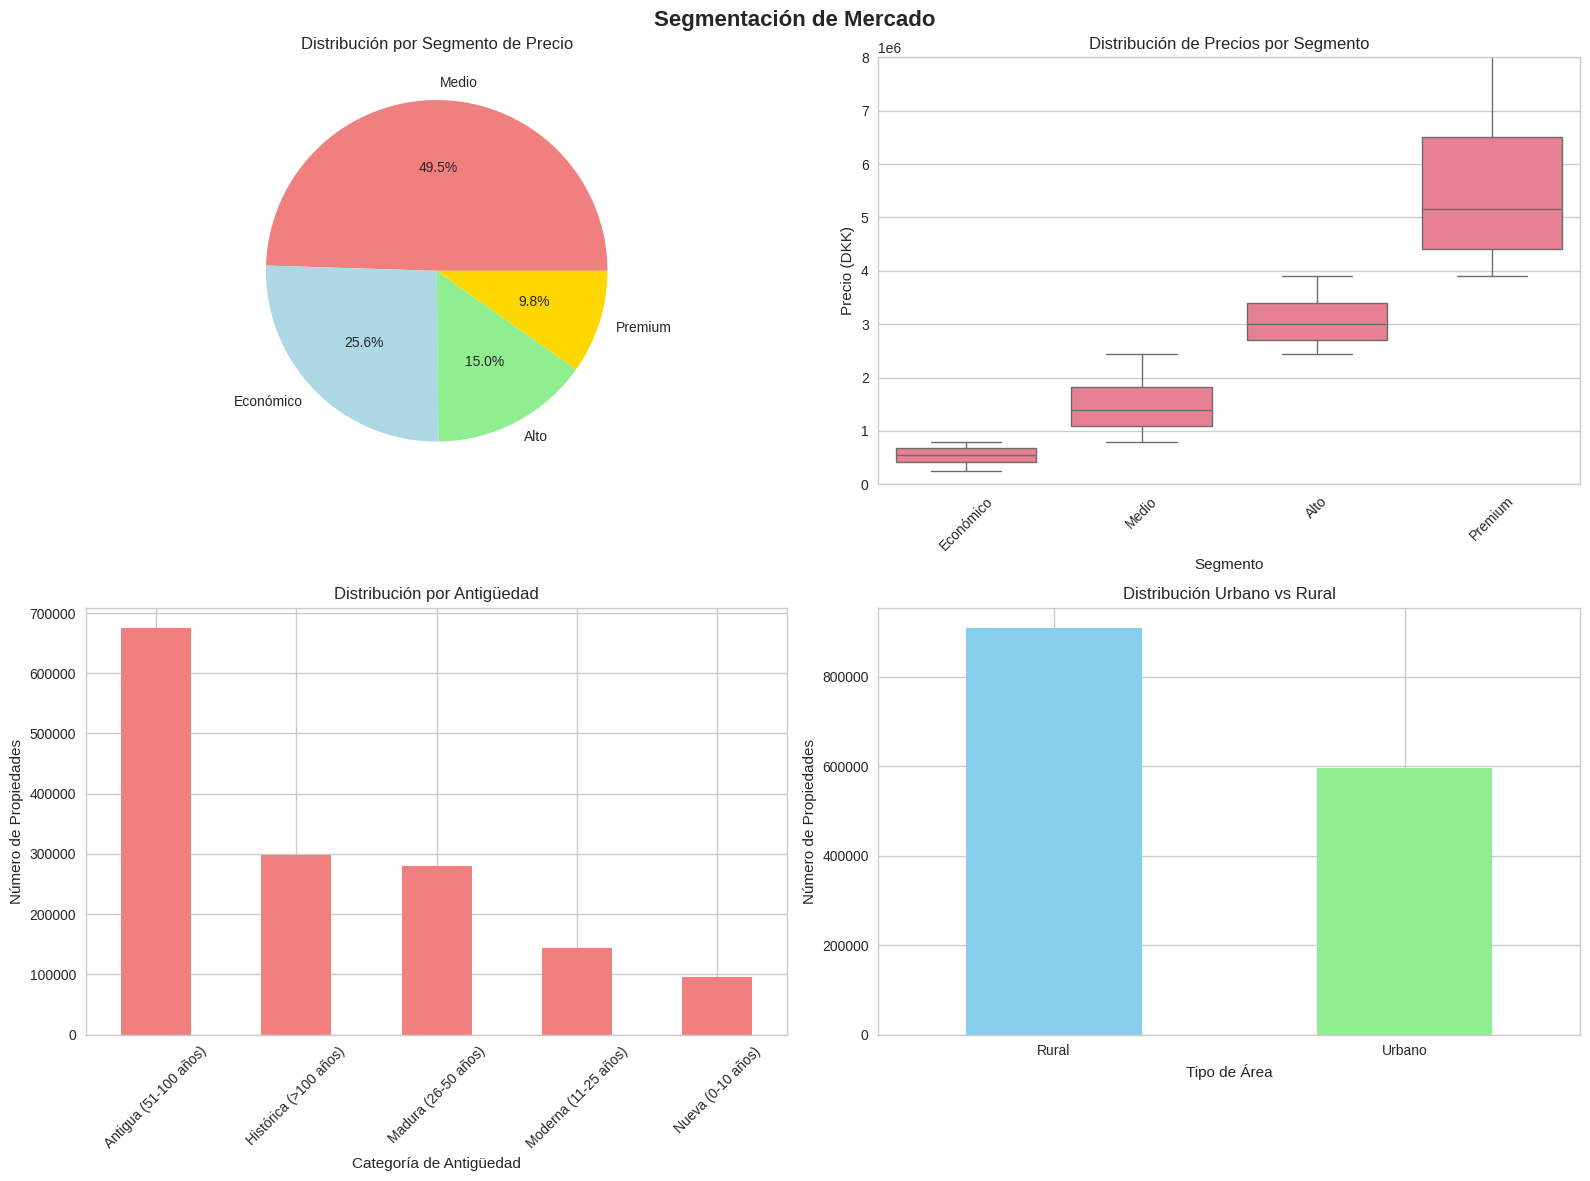


5.5 An√°lisis visual de mercados de nicho:


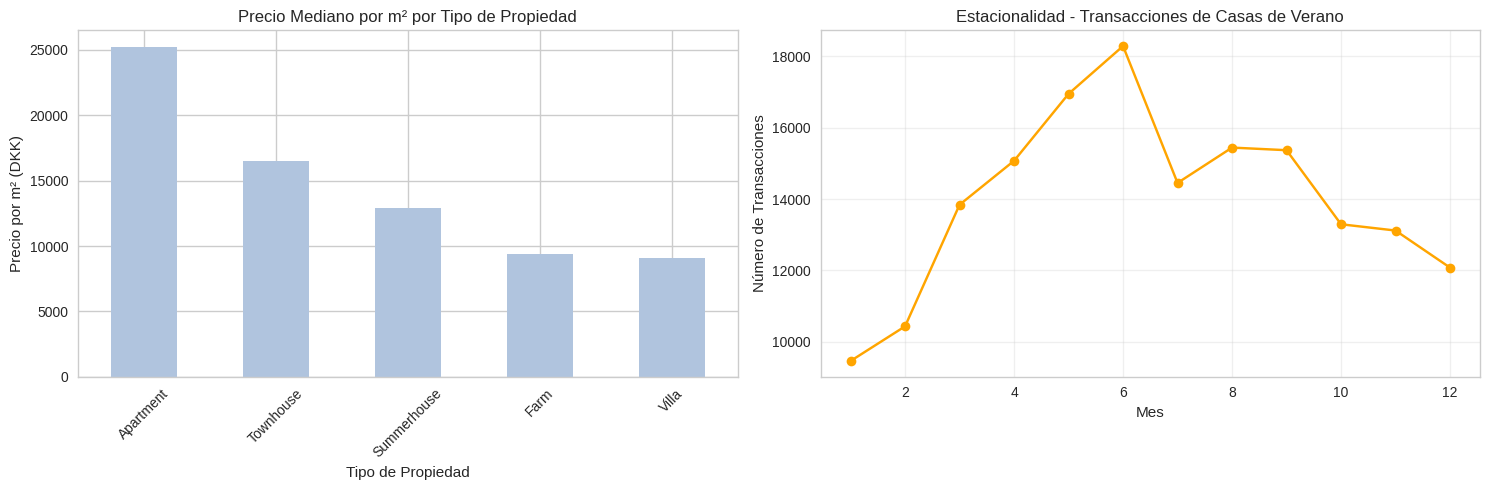


5.6 Resumen de insights de segmentaci√≥n:
SEGMENTACI√ìN POR PRECIO:
- Econ√≥mico: 386,404 propiedades (25.6%)
- Medio: 745,959 propiedades (49.5%)
- Alto: 226,412 propiedades (15.0%)
- Premium: 147,816 propiedades (9.8%)

SEGMENTACI√ìN URBANO/RURAL:
- Premium urbano: 1.5x m√°s caro que rural
- Diferencia precio/m¬≤: 7,170 DKK/m¬≤

MERCADOS DE NICHO:
- Farm: 1.5x el tama√±o promedio, 1.15x el precio mediano
- Summerhouse: 0.6x el tama√±o promedio, 0.65x el precio mediano

üéØ OPORTUNIDADES DE MERCADO IDENTIFICADAS:
üîç Segmento menos saturado: Premium (147,816 propiedades)
üìà Segmento dominante: Medio (745,959 propiedades)

üè† NICHOS DE MERCADO:
- Farm: 4.91% del mercado total
- Summerhouse: 11.14% del mercado total

‚úÖ An√°lisis de segmentaci√≥n completado exitosamente


In [16]:
# ===== VISUALIZACIONES DE SEGMENTACI√ìN DE MERCADO =====

# Crear visualizaciones principales de segmentaci√≥n
create_market_segmentation_plots(df_clean, market_segmentation_results, TARGET)

# Crear visualizaciones espec√≠ficas de nichos
niche_analysis = market_segmentation_results.get('niche_analysis', {})
create_niche_analysis_plots(df_clean, niche_analysis, TARGET)

# Imprimir insights detallados de segmentaci√≥n
print_segmentation_insights(market_segmentation_results, df_clean)

# An√°lisis adicional de oportunidades de mercado
print(f"\nüéØ OPORTUNIDADES DE MERCADO IDENTIFICADAS:")
print("=" * 50)

# Oportunidades por segmento de precio
if 'price_segmentation' in market_segmentation_results:
    df_with_segments = market_segmentation_results['price_segmentation']['df_with_segments']
    
    # Segmento con mayor crecimiento potencial
    segment_sizes = df_with_segments['price_segment'].value_counts()
    smallest_segment = segment_sizes.idxmin()
    largest_segment = segment_sizes.idxmax()
    
    print(f"üîç Segmento menos saturado: {smallest_segment} ({segment_sizes[smallest_segment]:,} propiedades)")
    print(f"üìà Segmento dominante: {largest_segment} ({segment_sizes[largest_segment]:,} propiedades)")

# Oportunidades por nicho
if niche_analysis:
    print(f"\nüè† NICHOS DE MERCADO:")
    for niche_name, niche_data in niche_analysis.items():
        if 'count' in niche_data:
            market_share = niche_data['count'] / len(df_clean) * 100
            print(f"- {niche_name}: {market_share:.2f}% del mercado total")

print(f"\n‚úÖ An√°lisis de segmentaci√≥n completado exitosamente")

In [17]:
# # Ejecutar an√°lisis completo usando el m√≥dulo
# results = run_complete_descriptive_analysis(df_clean)

# # Generar y mostrar reporte resumen
# summary_report = generate_summary_report(results)
# print(summary_report)

# # Exportar resultados a CSV (opcional)
# # export_results_to_csv(results, output_dir='results/tablas/')

# print(f"\nResultados disponibles en la variable 'results':")
# print(f"- regional_stats: Estad√≠sticas regionales")
# print(f"- sqm_stats: Estad√≠sticas de precio por m¬≤")
# print(f"- volume_stats: Estad√≠sticas de volumen")
# print(f"- yearly_stats: Estad√≠sticas temporales")
# print(f"- comparison_df: Comparaci√≥n de rankings")
# print(f"- premium_threshold: Umbral de mercado premium")
# print(f"- correlation: Correlaci√≥n volumen-precio")
# print(f"- cv_data: Coeficientes de variaci√≥n")

## Ejecuci√≥n Completa Extendida (Opcional)

Para ejecutar todo el an√°lisis extendido de una vez, incluyendo todos los nuevos an√°lisis:

In [18]:
# ===== RESUMEN EJECUTIVO COMPLETO DEL AN√ÅLISIS DESCRIPTIVO =====
print("="*80)
print("üèÜ RESUMEN EJECUTIVO - AN√ÅLISIS DESCRIPTIVO COMPLETO")
print("="*80)

print(f"\nüìä DATOS ANALIZADOS:")
print(f"- Total de transacciones: {len(df_clean):,}")
print(f"- Per√≠odo: 1992-2024")
print(f"- Regiones cubiertas: {df_clean['region'].nunique()}")
print(f"- Tipos de propiedad: {df_clean['house_type'].nunique()}")

print(f"\nüí∞ MERCADO GENERAL:")
print(f"- Precio mediano nacional: {df_clean[TARGET].median():,.0f} DKK")
print(f"- Precio promedio nacional: {df_clean[TARGET].mean():,.0f} DKK")
print(f"- Precio/m¬≤ mediano: {df_clean['sqm_price'].median():,.0f} DKK/m¬≤")

print(f"\nüè† POR TIPO DE PROPIEDAD:")
type_summary = df_clean.groupby('house_type')[TARGET].median().sort_values(ascending=False)
for prop_type, median_price in type_summary.items():
    count = len(df_clean[df_clean['house_type'] == prop_type])
    pct = count / len(df_clean) * 100
    print(f"- {prop_type}: {median_price:,.0f} DKK mediano ({count:,} transacciones, {pct:.1f}%)")

print(f"\nüåç POR REGI√ìN:")
regional_summary = df_clean.groupby('region')[TARGET].median().sort_values(ascending=False)
for region, median_price in regional_summary.items():
    count = len(df_clean[df_clean['region'] == region])
    pct = count / len(df_clean) * 100
    print(f"- {region}: {median_price:,.0f} DKK mediano ({count:,} transacciones, {pct:.1f}%)")

print(f"\nüìà SEGMENTACI√ìN DE MERCADO:")
if 'price_segmentation' in market_segmentation_results:
    df_segments = market_segmentation_results['price_segmentation']['df_with_segments']
    segment_counts = df_segments['price_segment'].value_counts()
    for segment in ['Econ√≥mico', 'Medio', 'Alto', 'Premium']:
        if segment in segment_counts.index:
            count = segment_counts[segment]
            pct = count / len(df_segments) * 100
            print(f"- Segmento {segment}: {count:,} propiedades ({pct:.1f}%)")

print(f"\nüèôÔ∏è URBANO VS RURAL:")
if 'urban_rural' in market_segmentation_results:
    urban_data = market_segmentation_results['urban_rural']['df_with_area_type']
    urban_subset = urban_data[urban_data['area_type'] == 'Urbano']
    rural_subset = urban_data[urban_data['area_type'] == 'Rural']
    
    if len(urban_subset) > 0 and len(rural_subset) > 0:
        urban_premium = urban_subset[TARGET].median() / rural_subset[TARGET].median()
        price_diff = urban_subset['sqm_price'].median() - rural_subset['sqm_price'].median()
        print(f"- Mercado urbano (Zealand): {urban_premium:.1f}x m√°s caro que rural")
        print(f"- Diferencia precio/m¬≤: +{price_diff:,.0f} DKK/m¬≤ en √°reas urbanas")

print(f"\nüìÖ PATRONES ESTACIONALES:")
if 'monthly_analysis' in market_behavior_results:
    monthly_stats = market_behavior_results['monthly_analysis']
    max_price_month = monthly_stats['median'].idxmax()
    max_volume_month = monthly_stats['count'].idxmax()
    print(f"- Mes con precios m√°s altos: {max_price_month} ({monthly_stats['median'][max_price_month]:,.0f} DKK)")
    print(f"- Mes con m√°s transacciones: {max_volume_month} ({monthly_stats['count'][max_volume_month]:,} transacciones)")

print(f"\nüíº CANALES DE VENTA:")
if market_behavior_results['sales_analysis'] is not None:
    # Obtener datos originales de sales_type
    sales_summary = df_clean.groupby('sales_type')[TARGET].agg(['count', 'median']).sort_values('median', ascending=False)
    for sales_type in sales_summary.head(3).index:
        median_price = sales_summary.loc[sales_type, 'median']
        count = sales_summary.loc[sales_type, 'count']
        pct = count / len(df_clean) * 100
        print(f"- {sales_type}: {median_price:,.0f} DKK mediano ({pct:.1f}% del mercado)")

print(f"\nüéØ INSIGHTS CLAVE:")
# Calcular insights din√°micamente
apt_price_sqm = df_clean[df_clean['house_type'] == 'Apartment']['sqm_price'].median()
print(f"1. Los apartamentos tienen el precio/m¬≤ m√°s alto ({apt_price_sqm:,.0f} DKK/m¬≤)")

if market_behavior_results['change_analysis'] is not None:
    avg_change = market_behavior_results['change_analysis']['stats']['mean']
    print(f"2. El mercado muestra negociaci√≥n t√≠pica del {avg_change:.2f}% del precio de oferta")

zealand_apt_pct = len(df_clean[(df_clean['region'] == 'Zealand') & (df_clean['house_type'] == 'Apartment')]) / len(df_clean[df_clean['region'] == 'Zealand']) * 100
print(f"3. Zealand concentra el mercado premium con {zealand_apt_pct:.0f}% de apartamentos")

if 'Summerhouse' in market_segmentation_results['niche_analysis']:
    seasonality = market_segmentation_results['niche_analysis']['Summerhouse'].get('seasonality')
    if seasonality:
        peak_months = list(seasonality['peak_months'].head(2).index)
        print(f"4. Las casas de verano tienen clara estacionalidad con pico en meses {peak_months[0]} y {peak_months[1]}")

print(f"5. El an√°lisis de {len(df_clean):,} transacciones revela un mercado maduro y diversificado")


üèÜ RESUMEN EJECUTIVO - AN√ÅLISIS DESCRIPTIVO COMPLETO

üìä DATOS ANALIZADOS:
- Total de transacciones: 1,506,591
- Per√≠odo: 1992-2024
- Regiones cubiertas: 4
- Tipos de propiedad: 5

üí∞ MERCADO GENERAL:
- Precio mediano nacional: 1,400,000 DKK
- Precio promedio nacional: 1,915,291 DKK
- Precio/m¬≤ mediano: 12,000 DKK/m¬≤

üè† POR TIPO DE PROPIEDAD:
- Apartment: 1,925,000 DKK mediano (293,435 transacciones, 19.5%)
- Farm: 1,700,000 DKK mediano (73,904 transacciones, 4.9%)
- Townhouse: 1,700,000 DKK mediano (155,301 transacciones, 10.3%)
- Villa: 1,295,000 DKK mediano (816,161 transacciones, 54.2%)
- Summerhouse: 950,924 DKK mediano (167,790 transacciones, 11.1%)

üåç POR REGI√ìN:
- Zealand: 1,844,002 DKK mediano (597,090 transacciones, 39.6%)
- Fyn & islands: 1,200,000 DKK mediano (138,425 transacciones, 9.2%)
- Jutland: 1,200,000 DKK mediano (755,183 transacciones, 50.1%)
- Bornholm: 895,000 DKK mediano (15,893 transacciones, 1.1%)

üìà SEGMENTACI√ìN DE MERCADO:
- Segmento Eco